# Template : Tensorflow - Time Series Problems

## Step 1 : Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization

## Step 2 : Load Dataset

In [2]:
%load_ext tensorboard

In [ ]:
%rmdir /Q /S ./logs

In [9]:
filename = 'D:\\Sandbox\\Github\\Data\\AirPassengers.csv'

In [10]:
df = pd.read_csv(filename)
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AirPassengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Step 3 : Train Test Split

In [12]:
# Please modify based on the problem  : # Here no of months for test

test_size = 12

train = df[:-test_size]    # 12 months for test and rest for training data split 
test  = df[-test_size:]

In [13]:
# Another way to do it without negative slicing. But above code is simpler
# test_ind = len(df) - test_size
# train = df[:test_ind]  
# test  = df[test_ind:]

In [14]:
print("Size of dataset : " + str(len(df)))
print("Size of test    : " + str(len(train)))
print("Size of train   : " + str(len(test)))

Size of dataset : 144
Size of test    : 132
Size of train   : 12


## Step 4 : Normalization

In [15]:
scaler = MinMaxScaler()

scaler.fit(train)

train = scaler.transform(train)
test  = scaler.transform(test)

MinMaxScaler()

## Step 5 : Time Series Generator

In [16]:
# Please modify based on the problem : 

n_features = 1     # only one value in the series (multivariate > 1)
n_input    = 12    # no of months as time step interval for the time series
batch_size = 6     # what is the batch here?

In [17]:
train_generator = TimeseriesGenerator(train, 
                                      train, 
                                      length = n_input, 
                                      batch_size = batch_size,
                                      shuffle = True)

## Step 6 : Model

In [18]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()

def fit_model_and_show_results (model, model_name):
  log_dir = "logs/fit/"+ model_name +"_"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  model.summary()
  history = model.fit(train_generator, epochs = epochs, verbose = 1, callbacks=[tensorboard_callback])
  plot_graphs(history, "loss")
  #plot_graphs(history, "accuracy")

### Simple RNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
 1/20 [>.............................] - ETA: 0s - loss: 0.1020WARNING:tensorflow:From C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
20/20 [==============================] - 0s 6ms/step - loss: 0.0549
Epoch 2/90
20/20 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 3/90
20/20 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 4/90
20/20 [==============================] - 0s 3ms/step - l

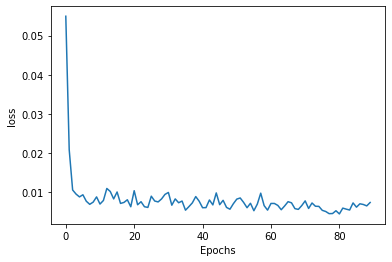

Reusing TensorBoard on port 6006 (pid 10220), started 2:11:11 ago. (Use '!kill 10220' to kill it.)

In [19]:
np.random.seed(42)
tf.random.set_seed(42)
epochs = 90

model_rnn = Sequential()
model_rnn.add(SimpleRNN(1, input_shape=(n_input, n_features)))

optimizer = tf.keras.optimizers.Adam(lr=0.005)
model_rnn.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_rnn, 'rnn')

%tensorboard --logdir logs/fit

### Deep RNN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 12, 20)            440       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 12, 20)            820       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
20/20 [==============================] - 2s 88ms/step - loss: 0.5219
Epoch 2/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0889
Epoch 3/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0306
Epoch 4/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 5/90
20/20 [==============================] - 0s 6ms/step -

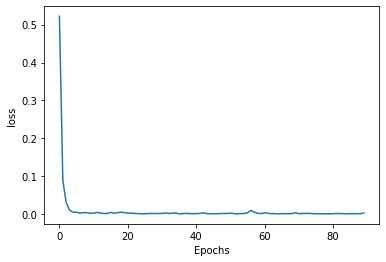

In [20]:
np.random.seed(42)
tf.random.set_seed(42)
epochs = 90

model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences=True, 
                    input_shape=(n_input, n_features)))
model_deep_rnn.add(SimpleRNN(20, return_sequences=True))
model_deep_rnn.add(SimpleRNN(1))

model_deep_rnn.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_deep_rnn, "deep_rnn")

### Deep RNN with Batch Norm

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 12, 20)            440       
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 20)            80        
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 12, 20)            820       
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 20)            80        
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 1)                 22        
Total params: 1,442
Trainable params: 1,362
Non-trainable params: 80
_________________________________________________________________
Epoch 1/90
20/20 [==============================] - 3s 127ms/step - loss: 0.5318
Epoch 2/90
20/20 [==================

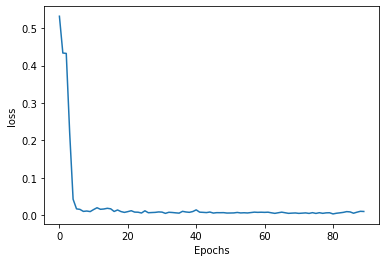

In [22]:
np.random.seed(42)
tf.random.set_seed(42)
epochs = 90

model_rnn_n = Sequential()
model_rnn_n.add(SimpleRNN(20, return_sequences=True, 
                          input_shape=(n_input, n_features)))
model_rnn_n.add(BatchNormalization())
model_rnn_n.add(SimpleRNN(20, return_sequences=True))
model_rnn_n.add(BatchNormalization())
model_rnn_n.add(SimpleRNN(1))

model_rnn_n.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_rnn_n, "rnn_batch_n")

### LSTMs

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
20/20 [==============================] - 1s 65ms/step - loss: 0.0619
Epoch 2/90
20/20 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 3/90
20/20 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 4/90
20/20 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 5/90
20/20 [==============================] - 0s 10ms/s

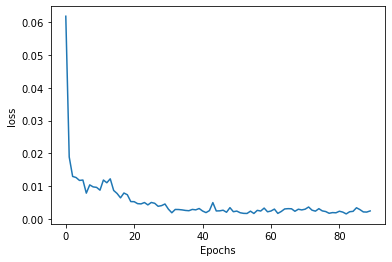

In [23]:
np.random.seed(42)
tf.random.set_seed(42)
epochs = 90

model_lstm = Sequential()

model_lstm.add(LSTM(200, 
          activation='relu', 
          input_shape=(n_input, n_features)))

model_lstm.add(Dropout(0.15))

model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse')

fit_model_and_show_results(model_lstm, "lstm")

### GRUs

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 12, 200)           121800    
_________________________________________________________________
gru_5 (GRU)                  (None, 200)               241200    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 363,201
Trainable params: 363,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
20/20 [==============================] - 2s 123ms/step - loss: 0.0676 - accuracy: 0.0000e+00
Epoch 2/90
20/20 [==============================] - 0s 20ms/step - loss: 0.0231 - accuracy: 0.0083
Epoch 3/90
20/20 [==============================] - 0s 19ms/step - loss: 0.0119 - accuracy: 0.0167
Epoch 4/90
20/20 [==============================] - 0s 18ms/step - loss: 0.0

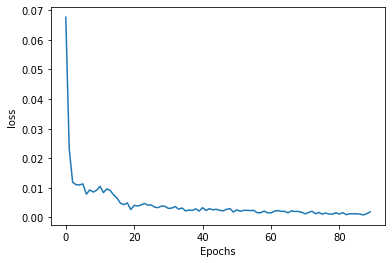

In [27]:
np.random.seed(42)
tf.random.set_seed(42)
epochs = 90

model_gru = Sequential()

model_gru.add(GRU(200, return_sequences=True,
                  activation='relu', 
                  input_shape=(n_input, n_features)))

model_gru.add(GRU(200, activation='relu'))

model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

fit_model_and_show_results(model_gru, "gru")

### CNN

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 64)            256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             12352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

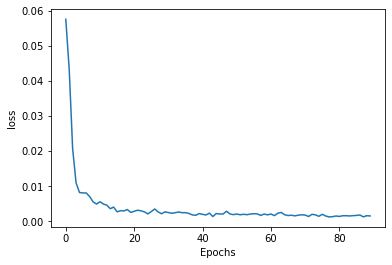

In [25]:
model_cnn = Sequential()

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', 
                     input_shape=((n_input, n_features))))
	
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
#model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

fit_model_and_show_results(model_cnn, "cnn")              

### CNN with GRUs

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 10, 32)            128       
_________________________________________________________________
gru_2 (GRU)                  (None, 10, 200)           140400    
_________________________________________________________________
gru_3 (GRU)                  (None, 200)               241200    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 381,929
Trainable params: 381,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
20/20 [==============================] - 2s 102ms/step - loss: 0.0381
Epoch 2/90
20/20 [==============================] - 0s 19ms/step - loss: 0.0164
Epoch 3/90
20/20 [==============================] - 0s 18ms/step - loss: 0.0108
Epoch

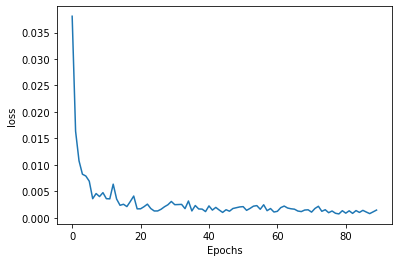

In [26]:
np.random.seed(42)
tf.random.set_seed(42)
epochs = 90

model_cnn_gru = Sequential()

model_cnn_gru.add(Conv1D(filters = 32, kernel_size = 3, padding="valid",
          input_shape=(n_input, n_features)))

model_cnn_gru.add(GRU(200, return_sequences=True))

model_cnn_gru.add(GRU(200, activation='relu'))

model_cnn_gru.add(Dense(1))

model_cnn_gru.compile(optimizer='adam', loss='mse')

fit_model_and_show_results(model_cnn_gru, "cnn_gru")

### Select Best Model 

In [102]:
model = model_lstm

## Step 7: Seed

In [103]:
# Set the seed value to grow the prediction
batch = train[-n_input:].reshape((1, n_input, n_features))   # stepping stone value


## Step 8 : Prediction

In [104]:
pred_list = []

# Predict using loop

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0])                # predict and save in list
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1) # set next value for prediction

In [105]:
# We have done Predictions for these times
df[-n_input:].index   # for the past 12 months

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [106]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, 
                          columns=['Prediction'])

In [107]:
df_predict

,Prediction
Month,
1960-01-01,379.836205
1960-02-01,385.720971
1960-03-01,408.041503
1960-04-01,413.329382
1960-05-01,455.692898
1960-06-01,532.496923
1960-07-01,610.816665
1960-08-01,601.366824
1960-09-01,510.185016


## Step 9 : Prediction + Actual

In [108]:
df_test = pd.concat([df,df_predict], axis=1)

In [109]:
# Just to do sanity check that there is no prediction beyond our test window
df_test[-14:]

,AirPassengers,Prediction
Month,,
1959-11-01,362,NaN
1959-12-01,405,NaN
1960-01-01,417,379.836205
1960-02-01,391,385.720971
1960-03-01,419,408.041503
1960-04-01,461,413.329382
1960-05-01,472,455.692898
1960-06-01,535,532.496923
1960-07-01,622,610.816665


## Step 10 : Evaluation

In [110]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_errors = {}

test_errors ['MAX_Error'] = max_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
test_errors ['MAE'] = mean_absolute_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
test_errors ['RMSE'] = mean_squared_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]], squared=False)
test_errors ['MSE'] = mean_squared_error(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]], squared=True)

pd.Series(test_errors)
pd.DataFrame(losses).tail(1)

MAX_Error     47.670618
MAE           16.508575
RMSE          21.603729
MSE          466.721125
dtype: float64

,loss
89,0.002397


## Step 11 : Plot

<AxesSubplot:xlabel='Month'>

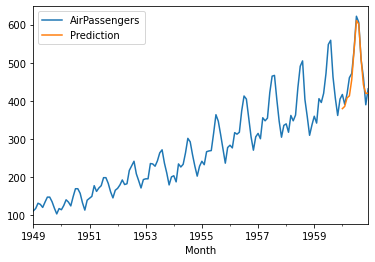

In [111]:
df_test.plot()

<Figure size 1440x360 with 0 Axes>

(array([-8036., -7305., -6575., -5844., -5114., -4383., -3653., -2922.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

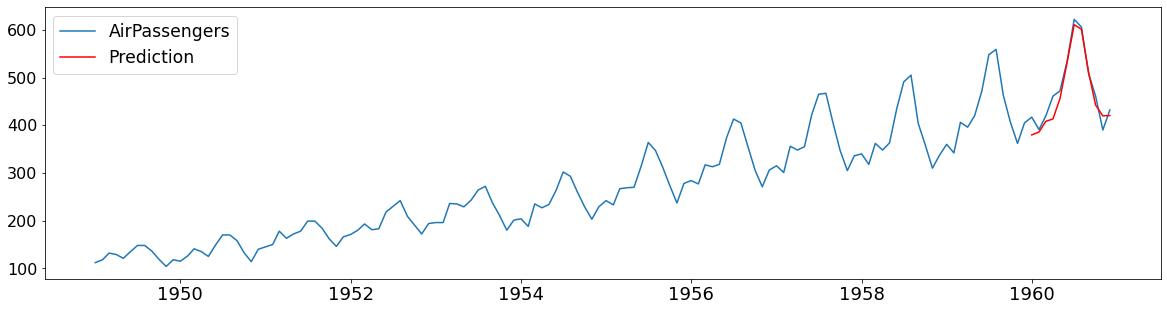

In [114]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPassengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(["AirPassengers", "Prediction"], loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

## Step 12 : Future Forecasting

### Optional : Full DS as train set

In [32]:
# Now use the full df for the future forecasting
train = df
len(train)

scaler.fit(train)
train = scaler.transform(train)

### Time Series Generator

n_input = 12
n_features = 1
batch_size = 6

generator = TimeseriesGenerator(train, 
                                train, 
                                length = n_input, 
                                batch_size = batch_size)

### Fit

model.fit(generator,epochs=90, verbose=0)

### Prediction

In [117]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],
                      [[pred_list[i]]],
                      axis=1)

In [118]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],
                            columns=df.columns)

In [119]:
future_dates

,AirPassengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [120]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, 
                          columns=['Prediction'])

### Future + Actual

In [121]:
df_projected = pd.concat([df,df_predict], axis=1)

In [122]:
df_projected

,AirPassengers,Prediction
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
...,...,...
1961-08-01,NaN,658.992634
1961-09-01,NaN,568.279889
1961-10-01,NaN,493.565874
1961-11-01,NaN,455.785088


### Plot

<Figure size 1440x360 with 0 Axes>

(array([-8036., -7305., -6575., -5844., -5114., -4383., -3653., -2922.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

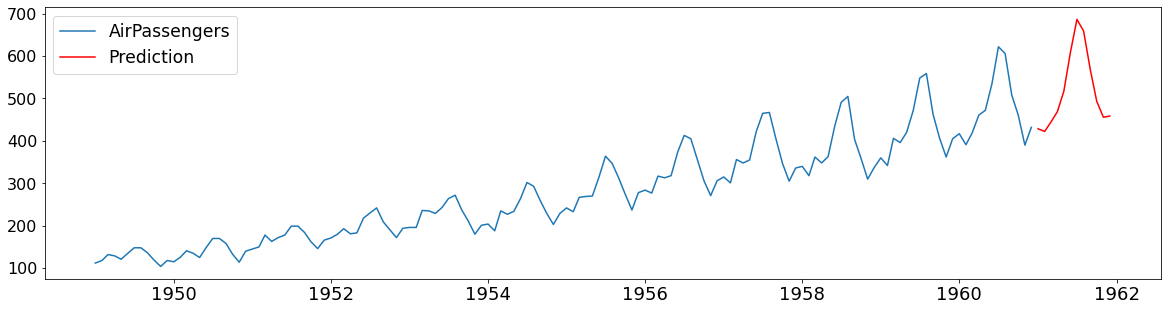

In [127]:
plt.figure(figsize=(20, 5))
plt.plot(df_projected.index, df_projected['AirPassengers'])
plt.plot(df_projected.index, df_projected['Prediction'], color='r')
plt.legend(["AirPassengers", "Prediction"], loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

<AxesSubplot:>

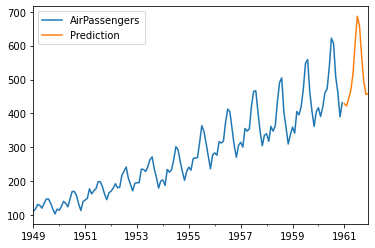

In [125]:
df_projected.plot()

## Conclusion :